In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')

In [2]:
!pip install missingno

In [3]:
import missingno

In [4]:
df1 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset_details = pd.read_csv('Car details v3.csv')

In [5]:
df1.shape

(4340, 8)

In [6]:
dataset_details.shape

(8128, 13)

In [7]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
dataset_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Combining Them to form Required Dataset

In [9]:
dataset = pd.merge(df1, dataset_details, how='left', left_on=['name', 'year'], right_on=['name', 'year'])

In [10]:
dataset.head()

,name,year,selling_price_x,km_driven_x,fuel_x,seller_type_x,transmission_x,owner_x,selling_price_y,km_driven_y,fuel_y,seller_type_y,transmission_y,owner_y,mileage,engine,max_power,torque,seats
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,90000.0,90000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
1,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,35000.0,10000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
2,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,75000.0,60000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
3,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,45000.0,73257.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
4,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,120000.0,70000.0,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0


In [11]:
dataset.shape

(12668, 19)

In [12]:
dataset.columns

Index(['name', 'year', 'selling_price_x', 'km_driven_x', 'fuel_x',
       'seller_type_x', 'transmission_x', 'owner_x', 'selling_price_y',
       'km_driven_y', 'fuel_y', 'seller_type_y', 'transmission_y', 'owner_y',
       'mileage', 'engine', 'max_power', 'torque', 'seats'],
      dtype='object')

In [13]:
dataset.drop(['selling_price_y',
       'km_driven_y', 'fuel_y', 'seller_type_y', 'transmission_y', 'owner_y', 'torque'], axis=1, inplace=True)

In [14]:
dataset.rename(columns={'name': 'car_name', 'selling_price_x': 'selling_pice', 'km_driven_x': 'km_driven',
                        'fuel_x': 'fuel', 'seller_type_x': 'seller_type', 'transmission_x': 'transmission', 
                        'owner_x': 'owner'}, inplace=True)

In [15]:
dataset.duplicated().sum()

8960

In [16]:
dataset.drop_duplicates(inplace=True)

In [17]:
dataset.head()

,car_name,year,selling_pice,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,4.0
4,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1061 CC,67 bhp,5.0
7,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,5.0
19,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,5.0
20,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,25.8 kmpl,1498 CC,98.6 bhp,5.0


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3708 entries, 0 to 12651
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      3708 non-null   object 
 1   year          3708 non-null   int64  
 2   selling_pice  3708 non-null   int64  
 3   km_driven     3708 non-null   int64  
 4   fuel          3708 non-null   object 
 5   seller_type   3708 non-null   object 
 6   transmission  3708 non-null   object 
 7   owner         3708 non-null   object 
 8   mileage       2195 non-null   object 
 9   engine        2195 non-null   object 
 10  max_power     2201 non-null   object 
 11  seats         2195 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 376.6+ KB


### Data Wrangling

In [19]:
# Making mileage variable data in proper format
def mileage(x):
  if type(x) == str:
    v, u = x.split()

    if u == 'kmpl':
      return float(v)
    else:
      v_kg = float(v)
      v_l = round(v_kg/0.75, 2)
      return v_l
  
  else:
    return x


In [20]:
dataset['mileage'] = dataset['mileage'].apply(mileage)

In [21]:
# Making Engine variable data in proper format
def engine(x):
  if type(x) == str:
    v, u = x.split()
    return int(v)
  
  else:
    return x


In [22]:
dataset['engine'] = dataset['engine'].apply(engine)

In [23]:
# Making max_power variable data in proper format
def max_power(x):
  if type(x) == str:
    ls = x.split()
    return float(ls[0])
  
  else:
    return x

In [24]:
dataset['max_power'] = dataset['max_power'].apply(max_power)

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3708 entries, 0 to 12651
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      3708 non-null   object 
 1   year          3708 non-null   int64  
 2   selling_pice  3708 non-null   int64  
 3   km_driven     3708 non-null   int64  
 4   fuel          3708 non-null   object 
 5   seller_type   3708 non-null   object 
 6   transmission  3708 non-null   object 
 7   owner         3708 non-null   object 
 8   mileage       2195 non-null   float64
 9   engine        2195 non-null   float64
 10  max_power     2201 non-null   float64
 11  seats         2195 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 376.6+ KB


In [26]:
dataset.describe()

,year,selling_pice,km_driven,mileage,engine,max_power,seats
count,3708.000000,3.708000e+03,3708.000000,2195.000000,2195.000000,2201.000000,2195.000000
mean,2012.984898,4.716321e+05,69671.511597,20.186014,1346.728018,82.262624,5.362187
std,4.193369,5.021338e+05,47379.028939,4.143265,465.310023,28.156387,0.890818
min,1992.000000,2.000000e+04,1.000000,0.000000,624.000000,0.000000,4.000000
25%,2011.000000,2.000000e+05,38000.000000,17.500000,999.000000,67.040000,5.000000
50%,2013.000000,3.500000e+05,62004.500000,20.000000,1248.000000,74.020000,5.000000
75%,2016.000000,6.000000e+05,90000.000000,22.925000,1497.000000,97.900000,5.000000
max,2020.000000,8.900000e+06,806599.000000,44.590000,3198.000000,254.800000,9.000000


#### Visualizing Missing Values

<AxesSubplot:>

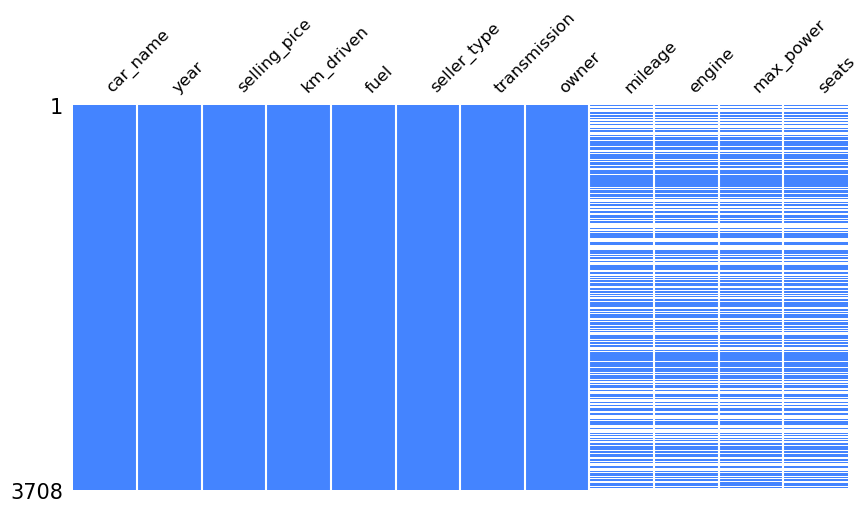

In [27]:
missingno.matrix(dataset, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

In [28]:
na_set = dataset.isna().sum().reset_index()
na_set = pd.DataFrame({'feature': na_set['index'], 'null (%)': round(na_set[0]/len(dataset), 2)})
na_set.sort_values('null (%)', ascending=False)

,feature,null (%)
8,mileage,0.41
9,engine,0.41
10,max_power,0.41
11,seats,0.41
0,car_name,0.00
1,year,0.00
2,selling_pice,0.00
3,km_driven,0.00
4,fuel,0.00
5,seller_type,0.00


<AxesSubplot:xlabel='mileage', ylabel='Density'>

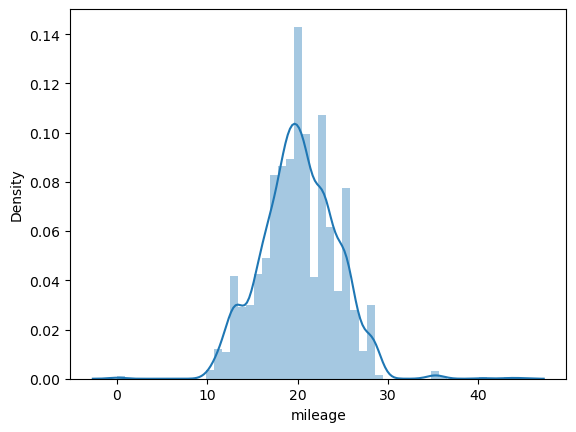

In [29]:
#Handling Missing value of mileage feature
fig, ax = plt.subplots()
sns.distplot(dataset['mileage'])

Since mileage is variable is normally distributed, therefore we can replace the missing values with mean of the mileage variable data

In [30]:
dataset['mileage'].fillna(dataset['mileage'].mean(), inplace=True)

<AxesSubplot:xlabel='engine', ylabel='Density'>

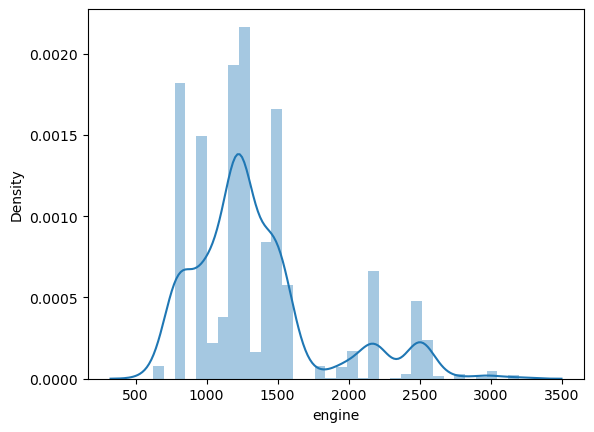

In [31]:
#Handling missing value of engine feature
fig, ax = plt.subplots()
sns.distplot(dataset['engine'])

Since engine variable is positively skewd, therefore we can replace the missing values with median of the mileage variable data

In [32]:
dataset['engine'].fillna(dataset['engine'].median(), inplace=True)

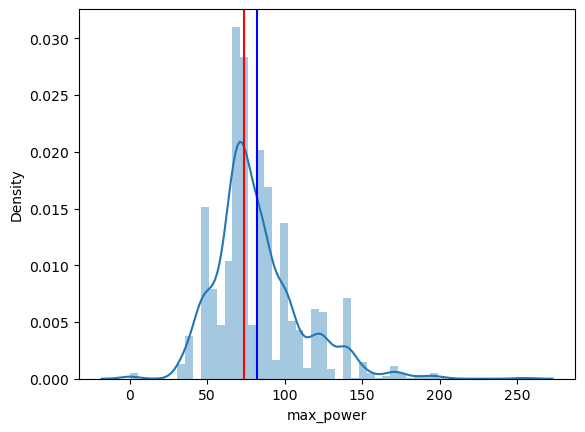

In [33]:
#Handling missing value of max_power feature
fig, ax = plt.subplots()
sns.distplot(dataset['max_power'])
ax.axvline(dataset['max_power'].median(), color = 'r', linestyle = '-')
ax.axvline(dataset['max_power'].mean(), color = 'b', linestyle = '-')

Since max_power variable is positively skewd, therefore we can replace the missing values with median of the mileage variable data

In [34]:
dataset['max_power'].fillna(dataset['max_power'].median(), inplace=True)

In [35]:
#Handling missing value of seats feature
most_freq = dataset['seats'].mode()[0]
dataset['seats'].fillna(most_freq, inplace=True)

#### Extracting Company name from car_name Column

In [37]:
def company_name(x):
  car_ls = x.split()
  return car_ls[0]

In [38]:
dataset['company'] = dataset['car_name'].apply(company_name)

In [39]:
dataset['company'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [40]:
dataset.loc[dataset['company'] == 'Land', ['company']] = 'Land Rover'

## Exploratory data analysis (EDA)

#### Univariate Analysis

In [41]:
numerical_variables = dataset.describe().columns
categorical_variables = [col for col in dataset.describe(include='object').columns if col not in ['car_name']]
print(numerical_variables.values)
print(' ')
print(categorical_variables)

['year' 'selling_pice' 'km_driven' 'mileage' 'engine' 'max_power' 'seats']
 
['fuel', 'seller_type', 'transmission', 'owner', 'company']


In [42]:
#discrete Variables
discrete_variables = [col for col in numerical_variables if len(dataset[col].unique()) < 20]
discrete_variables

['seats']

In [43]:
# Continuous Variables
continuous_variables = [col for col in numerical_variables if len(dataset[col].unique()) > 20]
continuous_variables

['year', 'selling_pice', 'km_driven', 'mileage', 'engine', 'max_power']

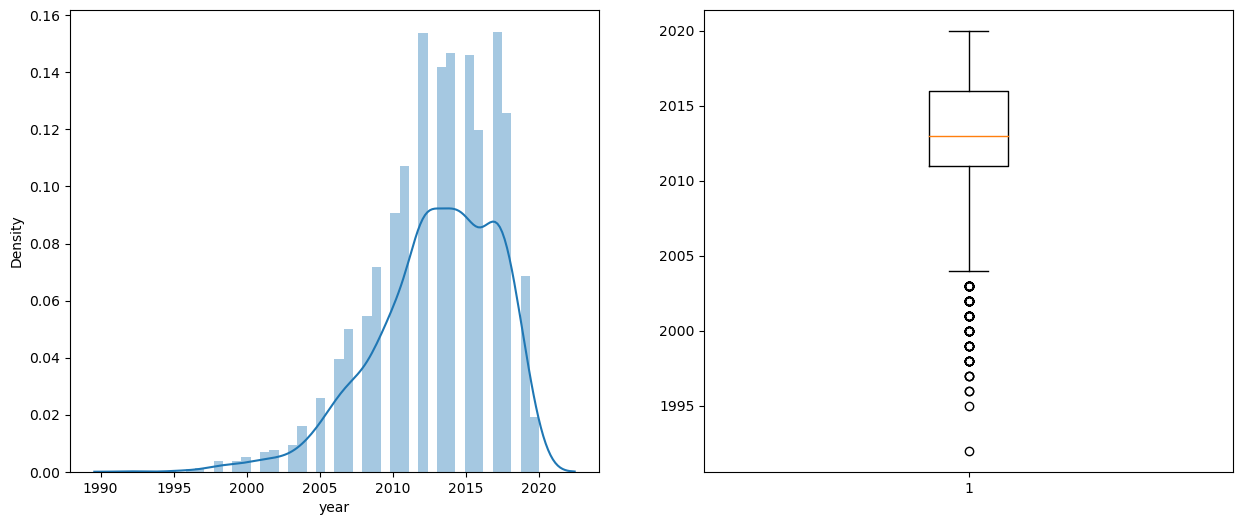

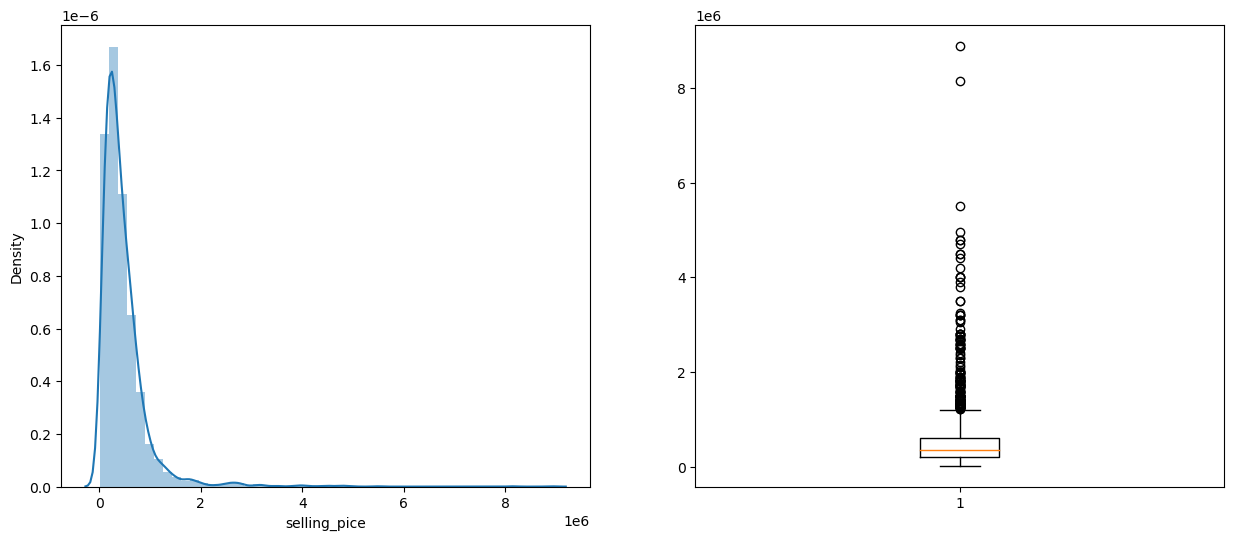

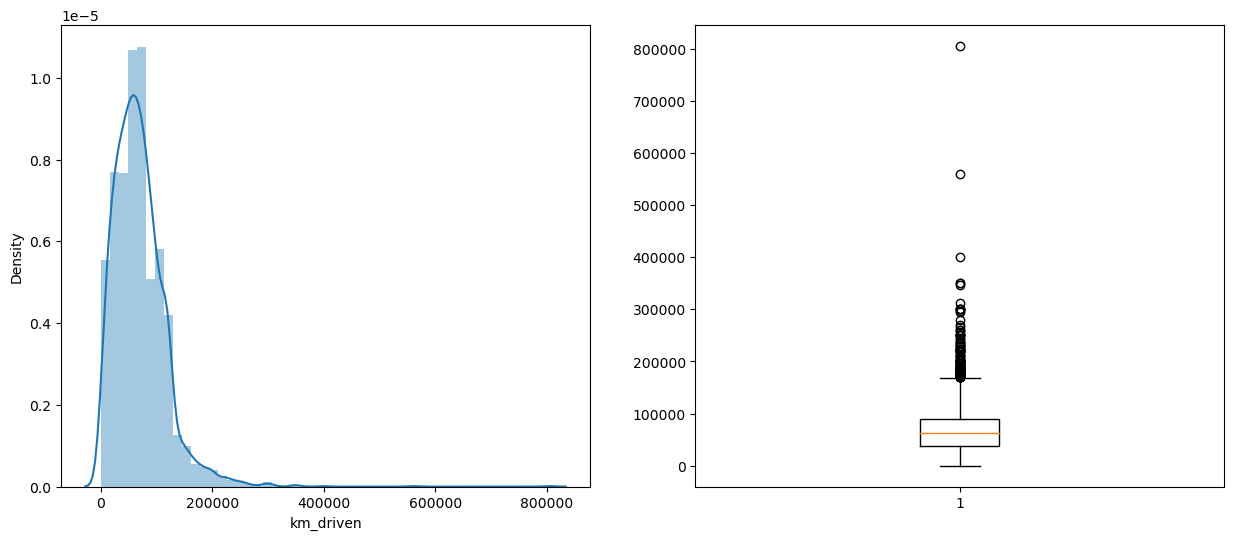

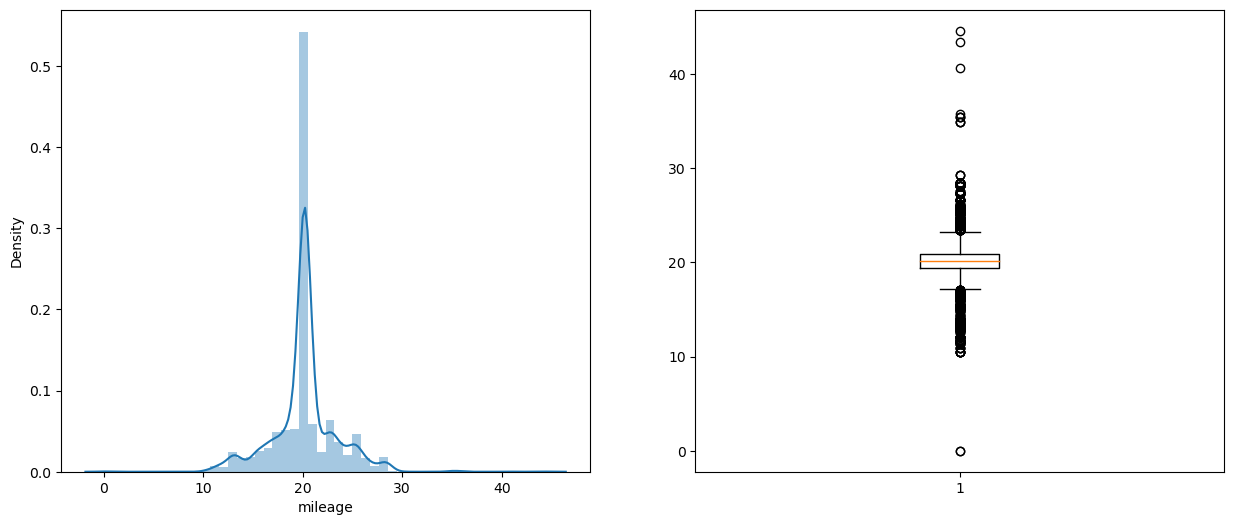

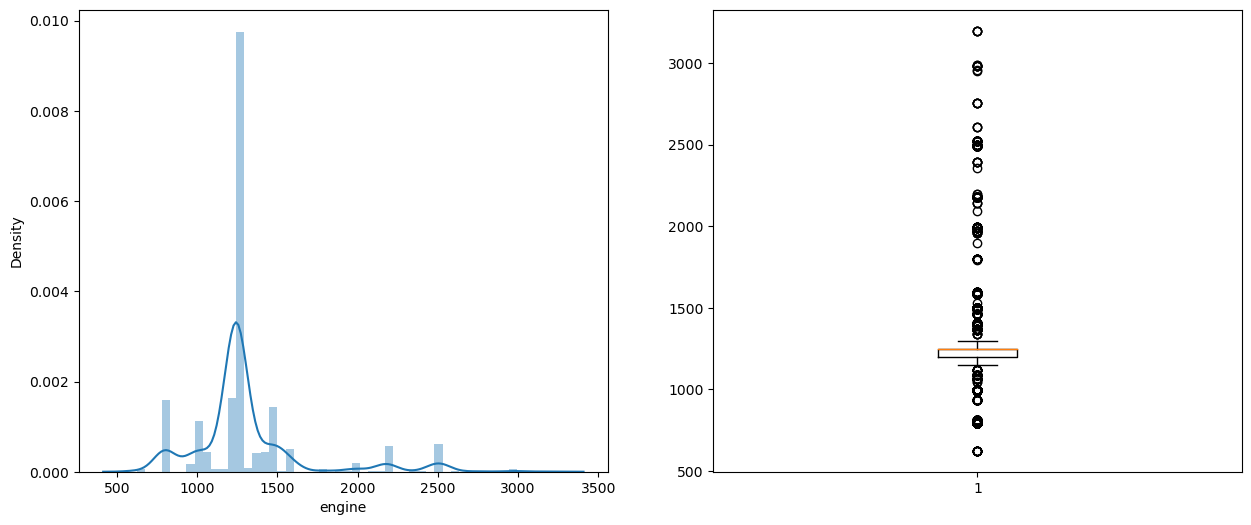

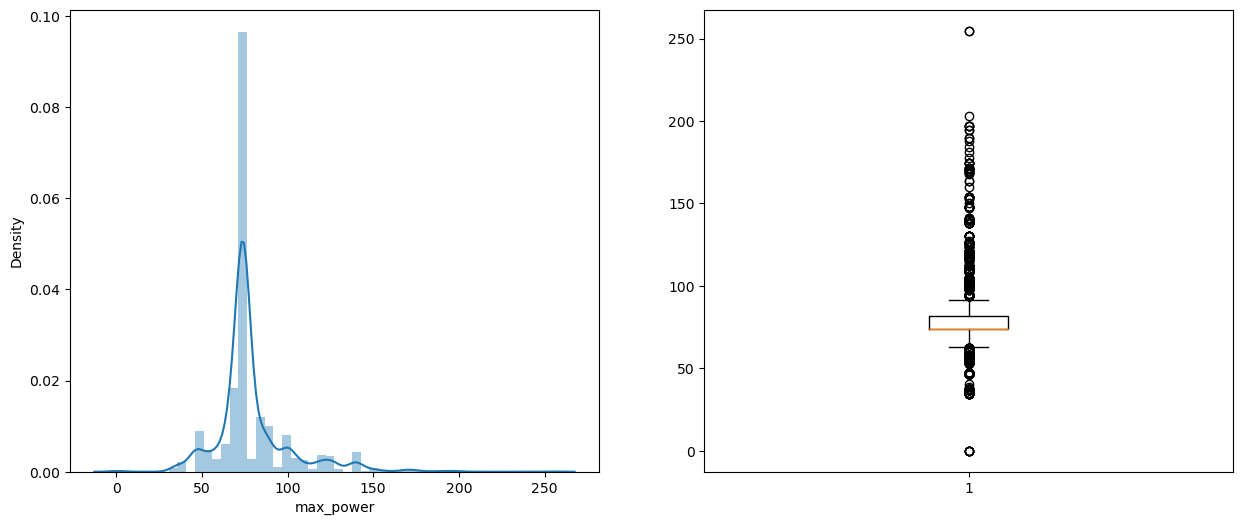

In [44]:
for col in continuous_variables:
  fig, ax = plt.subplots(1, 2, figsize=(15, 6))
  sns.distplot(dataset[col], ax=ax[0])

  ax[1].boxplot(dataset[col])


Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we should tackle these to improve the model performance.

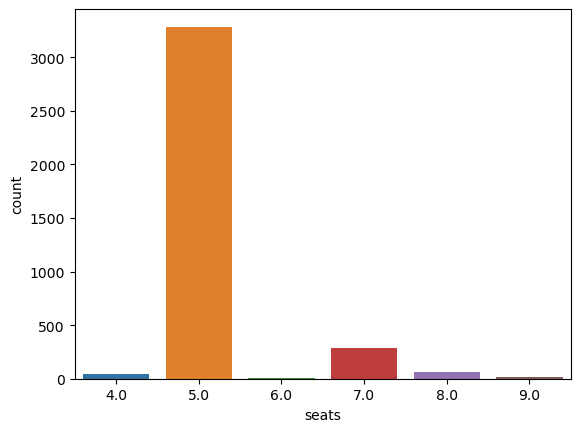

In [45]:
# Descrete
for col in discrete_variables:
  fig, ax = plt.subplots()
  sns.countplot(dataset[col])

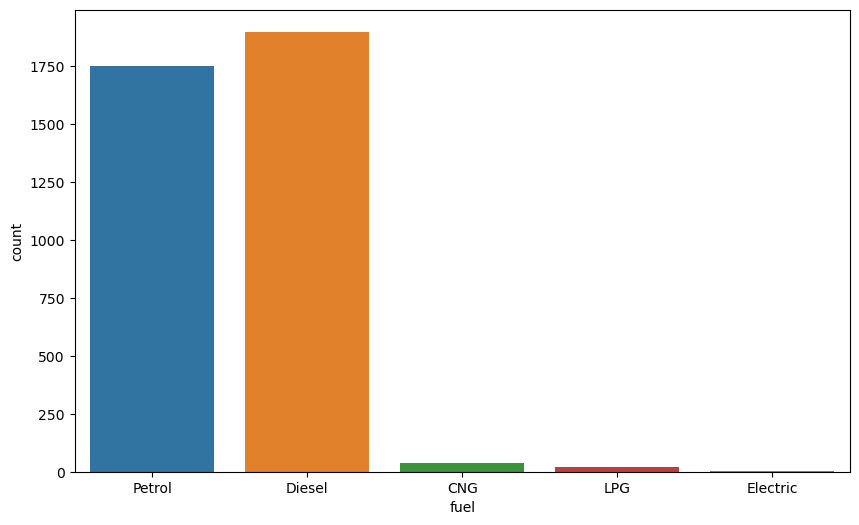

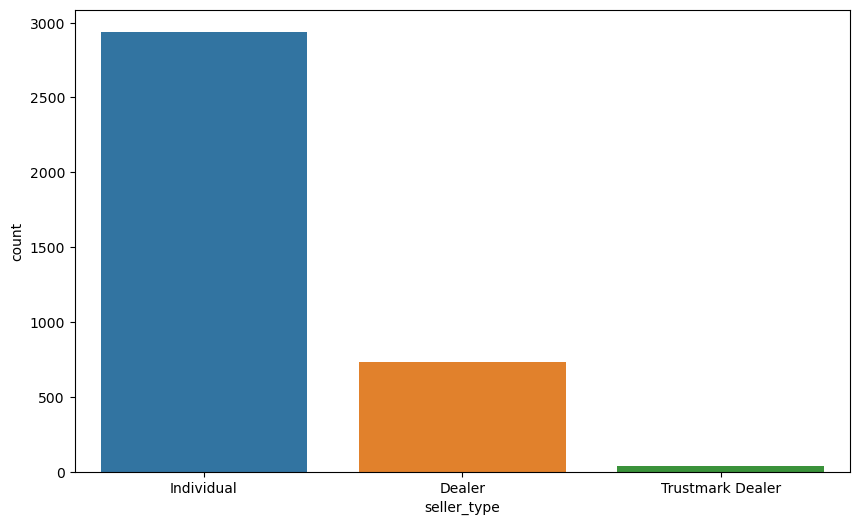

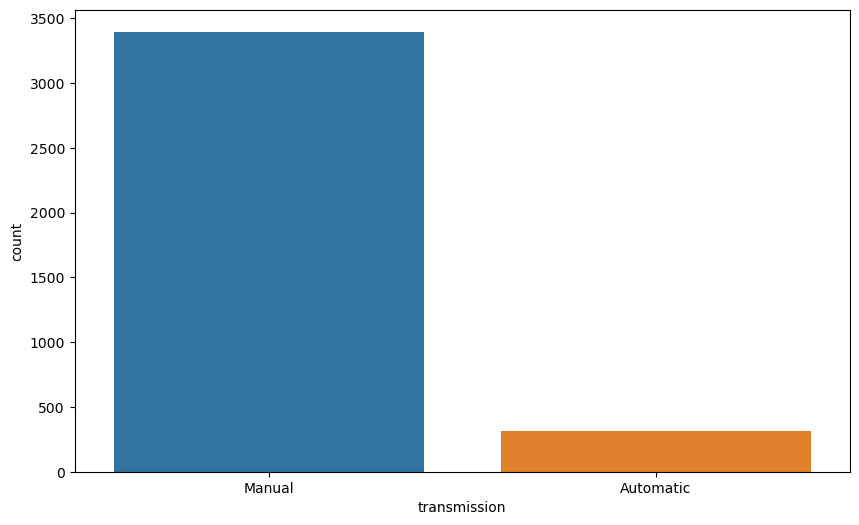

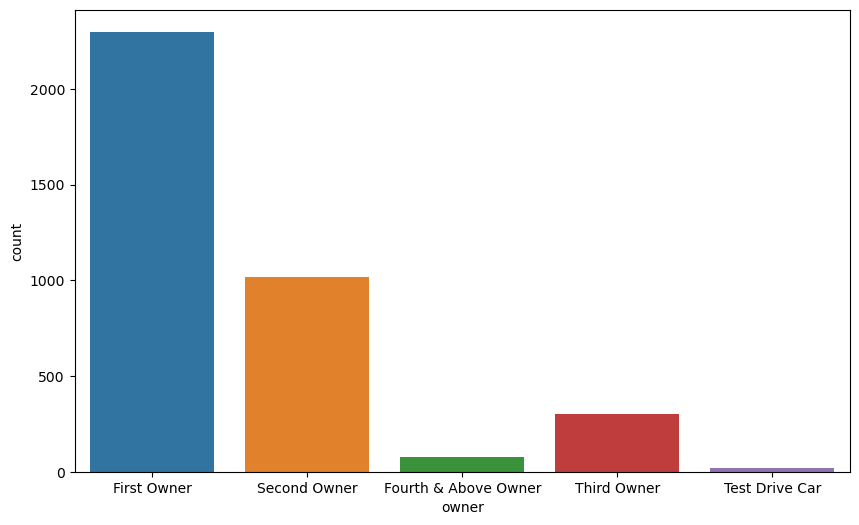

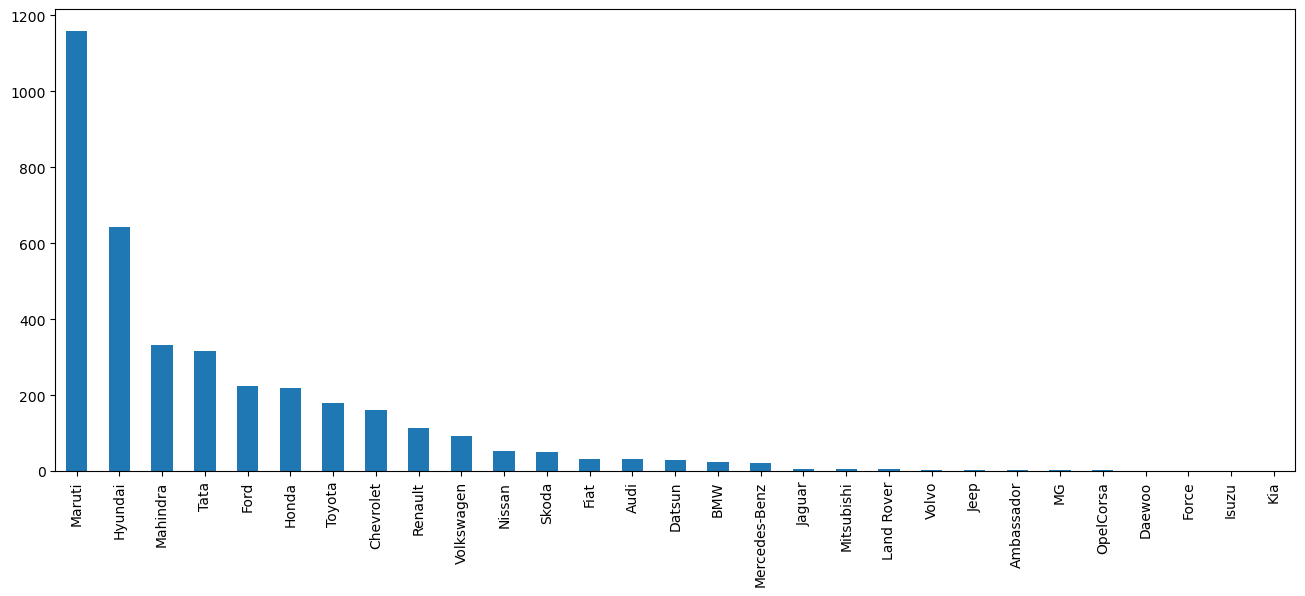

In [46]:
# categorical_variables
for col in categorical_variables:
  if col == 'company':
    fig, ax = plt.subplots(figsize=(16, 6))
    dataset[col].value_counts().plot(kind='bar')
  else:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(dataset[col])